# Import necessary packages

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import shap

c:\Users\rishi\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load the dataset

In [3]:
df = pd.read_csv("../data/raw/loan_default_dataset_v2.csv")

# Baseline Model

In [4]:
X = df.drop(columns=["default"])
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train_scaled, y_train)

baseline_preds = baseline_model.predict_proba(X_test_scaled)[:, 1]

In [5]:
baseline_auc = roc_auc_score(y_test, baseline_preds)
baseline_auc

0.8420512820512821

# Feature Engineering

In [6]:
df["loan_to_income"] = df["loan_amount"] / df["annual_income"]
df["income_per_year_employed"] = df["annual_income"] / (df["employment_years"] + 1)

# Retrain with New Features

In [7]:
X = df.drop(columns=["default"])
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

fe_model = LogisticRegression(max_iter=1000)
fe_model.fit(X_train_scaled, y_train)

fe_preds = fe_model.predict_proba(X_test_scaled)[:, 1]

In [8]:
fe_auc = roc_auc_score(y_test, fe_preds)
fe_auc

0.8605128205128205

In [ ]:
# SHAP explainer (logistic regression friendly)
explainer = shap.LinearExplainer(
    model,
    X_train_scaled,
    feature_names=X.columns
)


# SHAP explainer

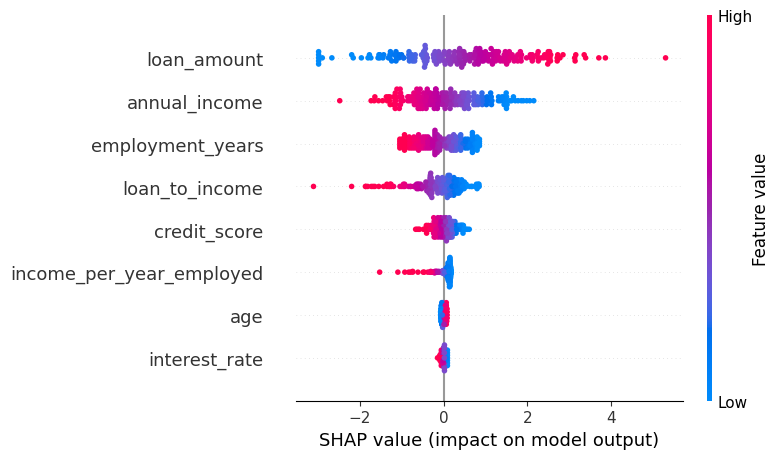

In [ ]:
explainer = shap.LinearExplainer(
    fe_model,
    X_train_scaled,
    feature_names=X.columns
)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(
    shap_values,
    features=X_test,
    feature_names=X.columns
)
